## Bank Loan Case Study 
#### (Trainity Project)

#### Task to perform 
1. Indentify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)
   Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.
2. Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.
3. Identify if there is data imbalance in the data. Find the ratio of data imbalance.
   Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.
4. Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.
5. Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there. Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.
6. Include visualizations and summarize the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases.

##### 1. Importing require libraries :

In [1]:
import pandas as pd #for reading dataset in python
import numpy as np #for performing calculation on dataset
import matplotlib.pyplot as plt #for ploting graph
import seaborn as sb #for graph 

##### 2. Importing datafiles in python 
###### * dataset: application_data

In [2]:
file_path = r'E:\JOB\Trainity\Projects\Project__6_bank_case\application_data.csv'
df_app = pd.read_csv(file_path)
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### 3. Understanding dataset
###### using describe funcition all statistical important parameter for non-numeric columns is counted

In [3]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
dimension = df_app.shape
dimension

(307511, 122)

In [5]:
df_app.columns
columns_types = df_app.dtypes
columns_types

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

##### 4. Working on Missing, Null values
##### Task : 1 :Indentify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

In [6]:
#displaying full data
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df_missing = pd.DataFrame(df_app.isnull().mean().round(3)*100, columns = ["missing_percentage_values"]).sort_values(by =['missing_percentage_values'])
df_missing

,missing_percentage_values
SK_ID_CURR,0.0
HOUR_APPR_PROCESS_START,0.0
REG_REGION_NOT_WORK_REGION,0.0
LIVE_REGION_NOT_WORK_REGION,0.0
REG_CITY_NOT_LIVE_CITY,0.0
REG_CITY_NOT_WORK_CITY,0.0
LIVE_CITY_NOT_WORK_CITY,0.0
ORGANIZATION_TYPE,0.0
FLAG_DOCUMENT_21,0.0
FLAG_DOCUMENT_20,0.0


In [7]:
#counting the columns by 0%, <10%, 10-50% and >50% of missing values
no_missing_value = (df_missing == 0).sum()
less_10_missing_value = ((df_missing > 0) & (df_missing <= 10)).sum()
between_10_50_missing_value = ((df_missing > 10) & (df_missing < 50)).sum()
greater_50_missing_value = (df_missing > 50).sum()
print("Count of Columns with no missing value:", no_missing_value)
print("Count of Columns having less than 10% missing value:", less_10_missing_value)
print("Count of Columns having missing value between 10% and 50%:", between_10_50_missing_value)
print("Count of Columns having greater than 50% missing value:", greater_50_missing_value)

Count of Columns with no missing value: missing_percentage_values    58
dtype: int64
Count of Columns having less than 10% missing value: missing_percentage_values    7
dtype: int64
Count of Columns having missing value between 10% and 50%: missing_percentage_values    16
dtype: int64
Count of Columns having greater than 50% missing value: missing_percentage_values    41
dtype: int64


In [8]:
columns_0_missing = round(df_missing[df_missing["missing_percentage_values"]==0].count()*100/len(df_missing),3)
print("no null values:",columns_0_missing)
columns_less_10_missing = round(df_missing[(df_missing["missing_percentage_values"]>0) & (df_missing["missing_percentage_values"]<=10)].count()*100/len(df_missing),3)
print("less than 10% null values:",columns_less_10_missing)
columns_between_10_50_missing =round(df_missing[(df_missing["missing_percentage_values"]>10) & (df_missing["missing_percentage_values"]<=50)].count()*100/len(df_missing),3)
print("null values between 10 to 50 :",columns_between_10_50_missing)
columns_greater_50_missing = round(df_missing[(df_missing["missing_percentage_values"]>50)].count()*100/len(df_missing),3)
print("null values with greater 50:",columns_greater_50_missing)

no null values: missing_percentage_values    47.541
dtype: float64
less than 10% null values: missing_percentage_values    5.738
dtype: float64
null values between 10 to 50 : missing_percentage_values    13.115
dtype: float64
null values with greater 50: missing_percentage_values    33.607
dtype: float64


In [9]:
#drop the column having missing values >50%
df_app_1 = df_app.drop(df_app.columns[(df_app.isnull().mean())*100 > 50], axis=1)
df_app_1.shape


(307511, 81)

In [10]:
#finding any missing values in rows 
rows_null = pd.DataFrame((df_app_1.isnull().sum(axis=1)),columns = ['missing_rows_values'])
rows_null.describe()

,missing_rows_values
count,307511.000000
mean,5.255311
std,4.701534
min,0.000000
25%,0.000000
50%,8.000000
75%,8.000000
max,20.000000


In [11]:
#list of columns
df_app_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

##### Conclusion from finding null or missing values in rows and column : 
1. After finding null values in coulmns: total 41 columns are droped having missing values >50% 
2. Dimension of new data set df_app_1 = 307511 rows and 81 columns
3. Null values in rows: maximum null value is 20 which is 25% of total entries in each row. So do not need to drop the rows.

### Dealing with Outliers
##### Task : 2 : Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

### Understanding outliers using boxplot and dealing with outliers
#####  Depending upon the task given
1. imputation will be perfomed, and 
2. outliers will be removed

###### finding an outliers: best method considered is box plot

In [12]:
# List to store columns with outliers
columns_with_outliers = []
# List to store columns without outliers
columns_no_outliers = []

# Select only numeric columns
numeric_columns = df_app_1.select_dtypes(include=[float, int]).columns

# Check for outliers
for column in numeric_columns:
    q1 = df_app_1[column].quantile(0.25)
    q3 = df_app_1[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_app_1[(df_app_1[column] < lower_bound) | (df_app_1[column] > upper_bound)]
    
    if outliers.empty:
        columns_no_outliers.append(column)
    else:
        columns_with_outliers.append(column)

print("Columns with outliers:", len(columns_with_outliers))
print(columns_with_outliers)
print("Columns without outliers:",len(columns_no_outliers))
print(columns_no_outliers)


Columns with outliers: 61
['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10'

In [13]:
columns_to_keep = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'INCOME_BIN', 'AMT_CREDIT', 'CREDIT_BIN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH(Years)', 'DAYS_EMPLOYED (Years)', 'DAYS_REGISTRATION(Years)', 'DAYS_ID_PUBLISH(Years)', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

df_app_final = df_app_1.filter(columns_to_keep)

df_app_final.shape

(307511, 23)

## Outlier analysis

##### Again checking for numbers of columns having outliers to perform task

In [14]:
# List to store columns with outliers
columns_with_outliers = []
# List to store columns without outliers
columns_no_outliers = []

# Select only numeric columns
numeric_columns = df_app_final.select_dtypes(include=[float, int]).columns

# Check for outliers
for column in numeric_columns:
    q1 = df_app_final[column].quantile(0.25)
    q3 = df_app_final[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_app_final[(df_app_final[column] < lower_bound) | (df_app_final[column] > upper_bound)]
    
    if outliers.empty:
        columns_no_outliers.append(column)
    else:
        columns_with_outliers.append(column)

print("Columns with outliers:", len(columns_with_outliers))
print("Columns without outliers:",len(columns_no_outliers))


Columns with outliers: 12
Columns without outliers: 1


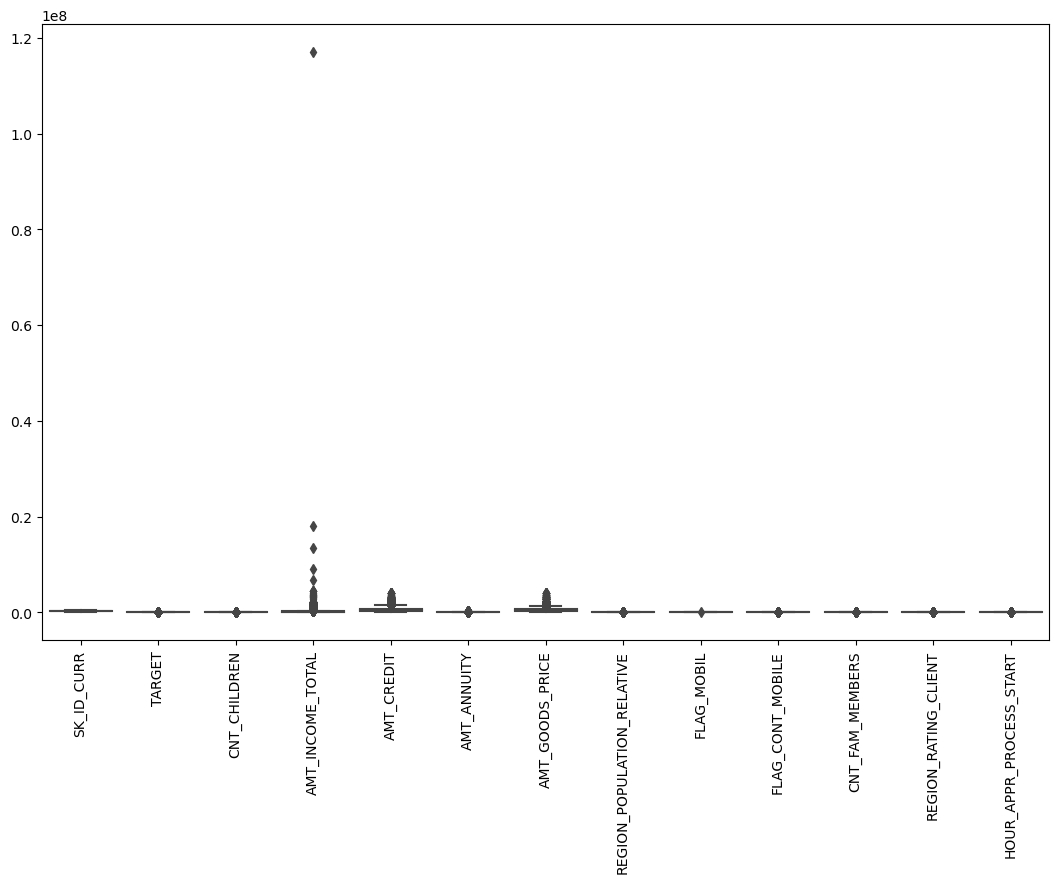

In [15]:
plt.figure(figsize=(13, 8))
sb.boxplot(data=df_app_final)
plt.xticks(rotation=90)
plt.show()

Now as seen from the above graph, few columns have outliers: so using boxplot outliers nature is understood.

In [16]:
# Select only numeric columns
numeric_columns = df_app_final.select_dtypes(include=[float, int]).columns

# Calculate the number and percentage of outliers in each column
outlier_counts = {}

# Check for outliers
for column in numeric_columns:
    q1 = df_app_final[column].quantile(0.25)
    q3 = df_app_final[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_app_final[(df_app_final[column] < lower_bound) | (df_app_final[column] > upper_bound)]
    
    outlier_count = len(outliers)
    total_count = len(df_app_final[column])
    outlier_percentage = (outlier_count / total_count) * 100
    
    outlier_counts[column] = (outlier_count, outlier_percentage)

# Display the outlier counts and percentages
print("Outlier Summary:")
for column, (count, percentage) in outlier_counts.items():
    print(f"{column}: {count} outliers ({percentage:.2f}%)")


Outlier Summary:
SK_ID_CURR: 0 outliers (0.00%)
TARGET: 24825 outliers (8.07%)
CNT_CHILDREN: 4272 outliers (1.39%)
AMT_INCOME_TOTAL: 14035 outliers (4.56%)
AMT_CREDIT: 6562 outliers (2.13%)
AMT_ANNUITY: 7504 outliers (2.44%)
AMT_GOODS_PRICE: 14728 outliers (4.79%)
REGION_POPULATION_RELATIVE: 8412 outliers (2.74%)
FLAG_MOBIL: 1 outliers (0.00%)
FLAG_CONT_MOBILE: 574 outliers (0.19%)
CNT_FAM_MEMBERS: 4007 outliers (1.30%)
REGION_RATING_CLIENT: 80527 outliers (26.19%)
HOUR_APPR_PROCESS_START: 2257 outliers (0.73%)


count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

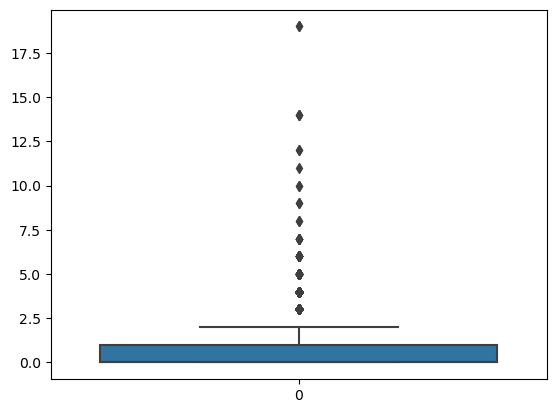

In [17]:
#analysis of column having 1.39% outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['CNT_CHILDREN'])
df_app_final['CNT_CHILDREN'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

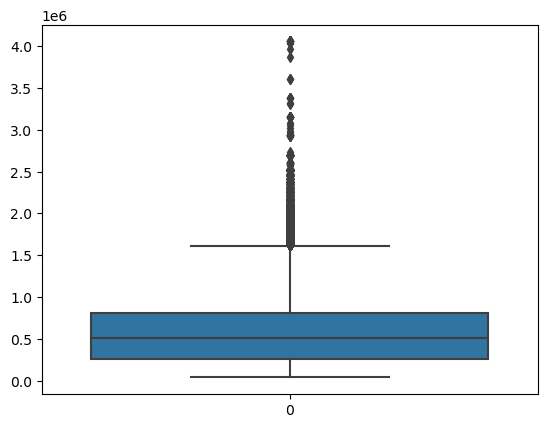

In [18]:
#analysis of column having 2.13% outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['AMT_CREDIT'])
df_app_final['AMT_CREDIT'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

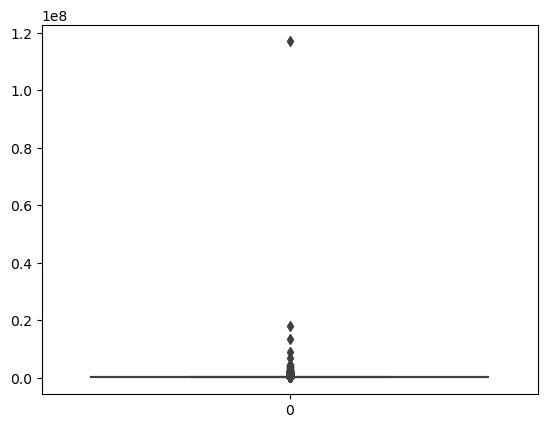

In [19]:
#analysis of column having 4.56% outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['AMT_INCOME_TOTAL'])
df_app_final['AMT_INCOME_TOTAL'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

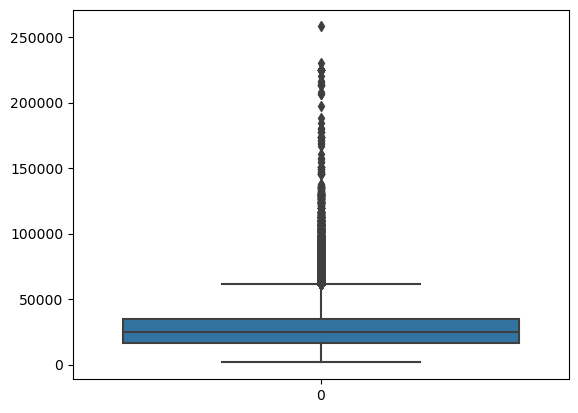

In [20]:
#analysis of column having 2.44% outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['AMT_ANNUITY'])
df_app_final['AMT_ANNUITY'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

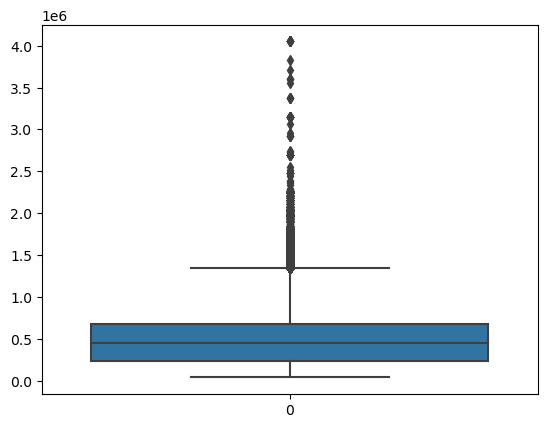

In [21]:
#analysis of column having 4.79% outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['AMT_GOODS_PRICE'])
df_app_final['AMT_GOODS_PRICE'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

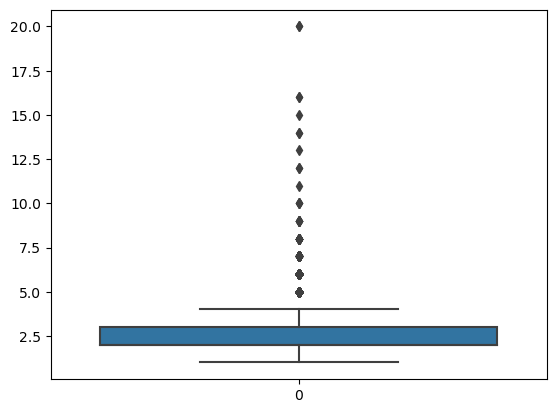

In [22]:
#analysis of column having 1.30 % outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['CNT_FAM_MEMBERS'])
df_app_final['CNT_FAM_MEMBERS'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

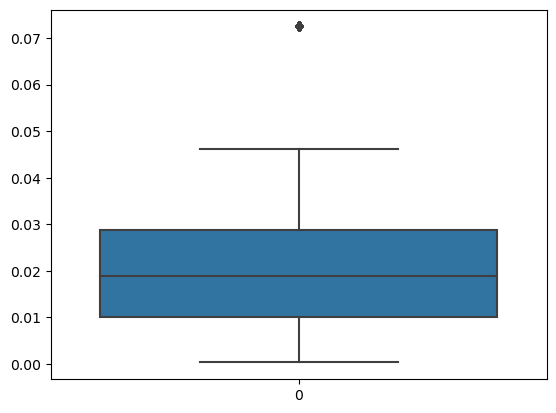

In [23]:
#analysis of column having 2.74% outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['REGION_POPULATION_RELATIVE'])
df_app_final['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

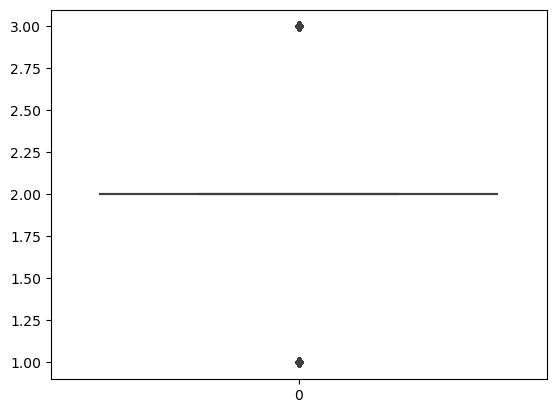

In [24]:
#analysis of column having 26.19% outliers, understanding statistical parameter for column
sb.boxplot(df_app_final['REGION_RATING_CLIENT'])
df_app_final['REGION_RATING_CLIENT'].describe()

In [25]:
class_counts = df_app_1['TARGET'].value_counts()
class_proportions = class_counts / len(df_app_1) * 100
print("Class Counts:")
print(class_counts)
print("\nClass Proportions (%):")
print(class_proportions)


Class Counts:
0    282686
1     24825
Name: TARGET, dtype: int64

Class Proportions (%):
0    91.927118
1     8.072882
Name: TARGET, dtype: float64


In [26]:
# Calculate the class proportions
gender_counts = df_app_final['CODE_GENDER'].value_counts()
total_samples = len(df_app_final)
class_proportions = gender_counts / total_samples * 100

# Display the class proportions
print('Class Proportions (%):')
print(class_proportions)


Class Proportions (%):
F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


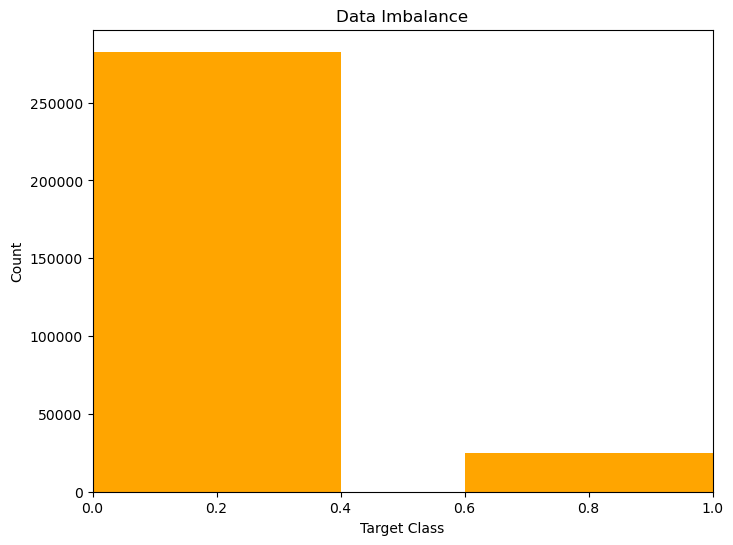

In [27]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_app_final['TARGET'].value_counts().index, df_app_final['TARGET'].value_counts(), color = 'orange')

# Set the x-axis limits
plt.xlim(0, 1)

# Set the labels and title
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Data Imbalance')

# Display the plot
plt.show()

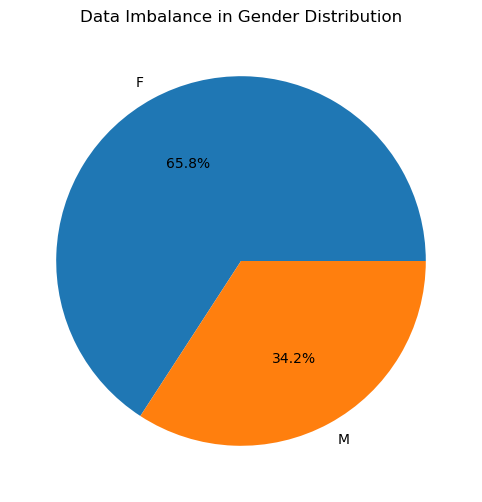

In [28]:
df_m_f = df_app_final[df_app_final['CODE_GENDER'].isin(['M', 'F'])]
gender_counts = df_m_f['CODE_GENDER'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Data Imbalance in Gender Distribution')
plt.show()


In [29]:
#### Data imbalance insights: 
##### a. Majority of counts falls in class 0 with 91.2 % and minority with 8.1% in class 1
##### b. Target variable significantly shows data imbalance 

#### Task : 4 :

##### Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

### UNIVARIATE ANALYSIS

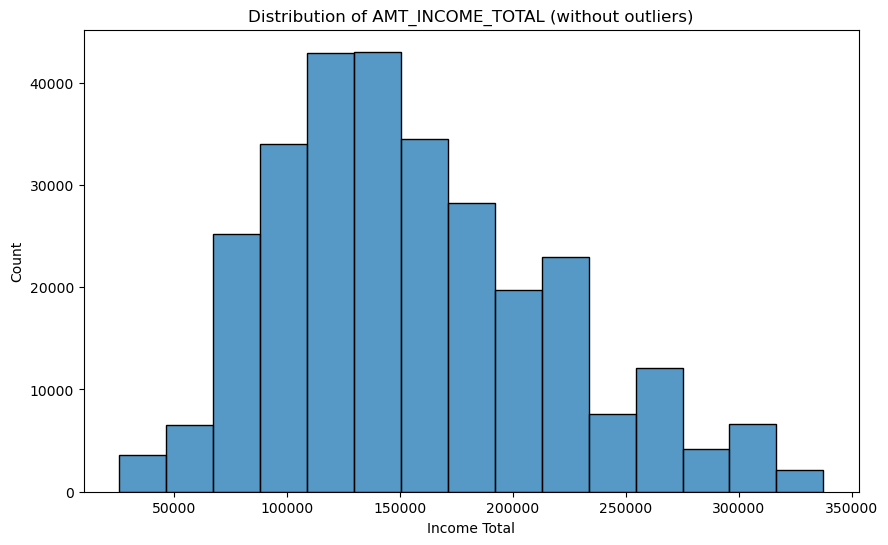

In [30]:
Q1 = df_app_final['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df_app_final['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
# Remove outliers
filtered_data = df_app_final[(df_app_final['AMT_INCOME_TOTAL'] >= Q1 - 1.5 * IQR) & (df_app_final['AMT_INCOME_TOTAL'] <= Q3 + 1.5 * IQR)]
# Plot the histogram
plt.figure(figsize=(10, 6))
sb.histplot(data=filtered_data , x='AMT_INCOME_TOTAL', bins=15, kde=False)
plt.xlabel('Income Total')
plt.ylabel('Count')
plt.title('Distribution of AMT_INCOME_TOTAL (without outliers)')
plt.show()


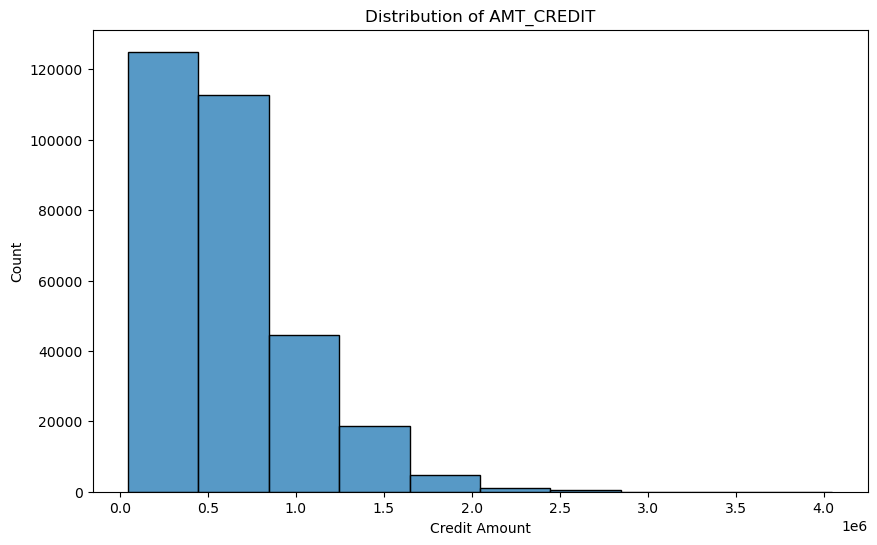

In [31]:
# Univariate analysis for AMT_CREDIT
plt.figure(figsize=(10, 6))
sb.histplot(data=df_app_final, x='AMT_CREDIT', bins = 10, kde=False)
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.title('Distribution of AMT_CREDIT')
plt.show()

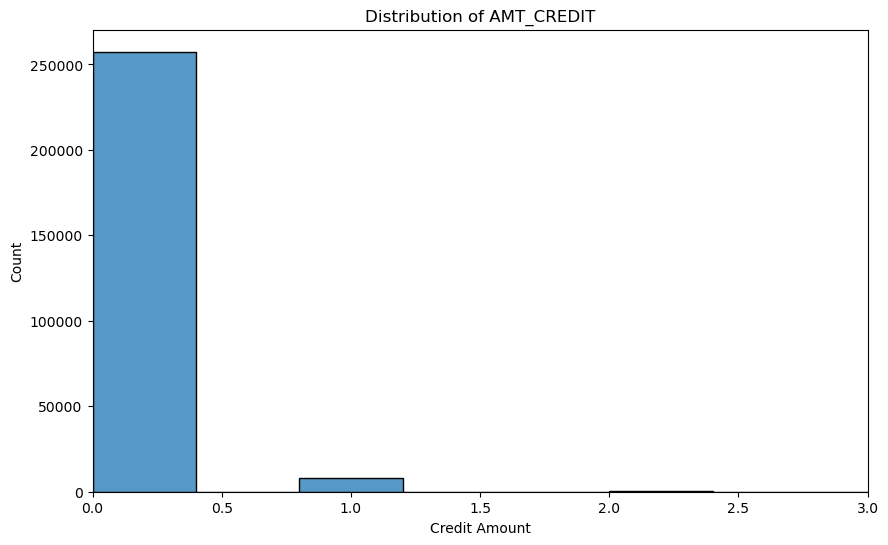

In [32]:
# Univariate analysis for AMT_REQ_CREDIT_BUREAU_WEEK
plt.figure(figsize=(10, 6))
sb.histplot(data=df_app_1, x='AMT_REQ_CREDIT_BUREAU_WEEK', bins = 20, kde=False)
plt.xlim(0,3)
plt.xlabel('Credit Amount')
plt.ylabel('Count')
plt.title('Distribution of AMT_CREDIT')
plt.show()

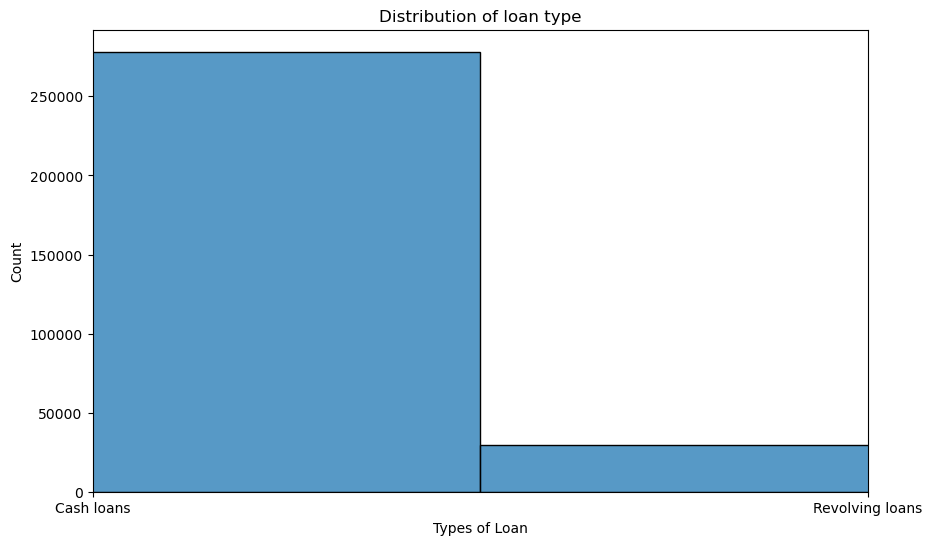

In [33]:
# Univariate analysis for AMT_REQ_CREDIT_BUREAU_WEEK
plt.figure(figsize=(10, 6))
sb.histplot(data=df_app_1, x='NAME_CONTRACT_TYPE', bins = 20, kde=False)
plt.xlim(0,1)
plt.xlabel('Types of Loan')
plt.ylabel('Count')
plt.title('Distribution of loan type')
plt.show()

### Segmented Univariate Analysis

##### Segmented Univariate for : 
1. NAME_INCOME_TYPE
2. ORGANIZATION_TYPE

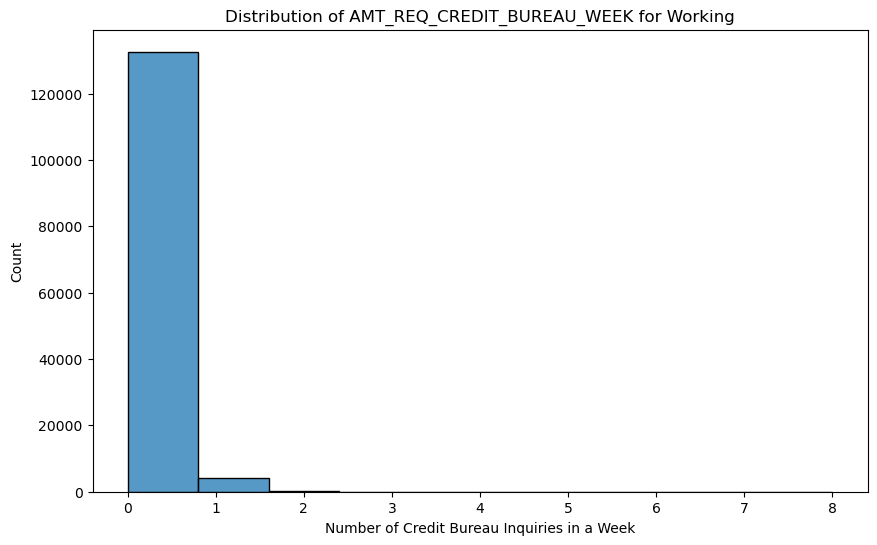

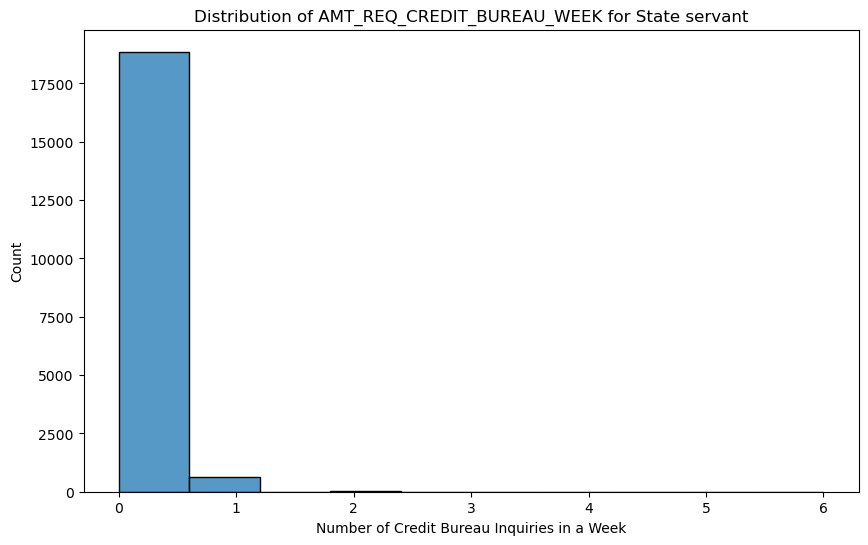

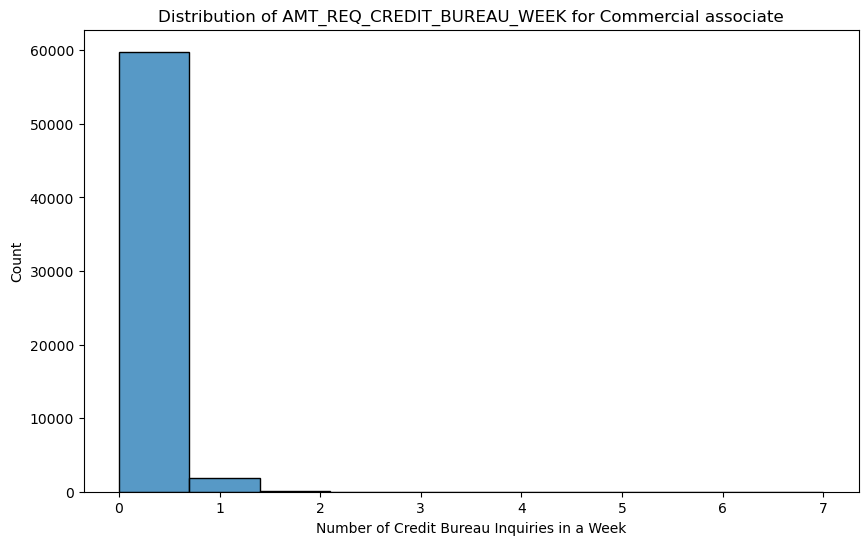

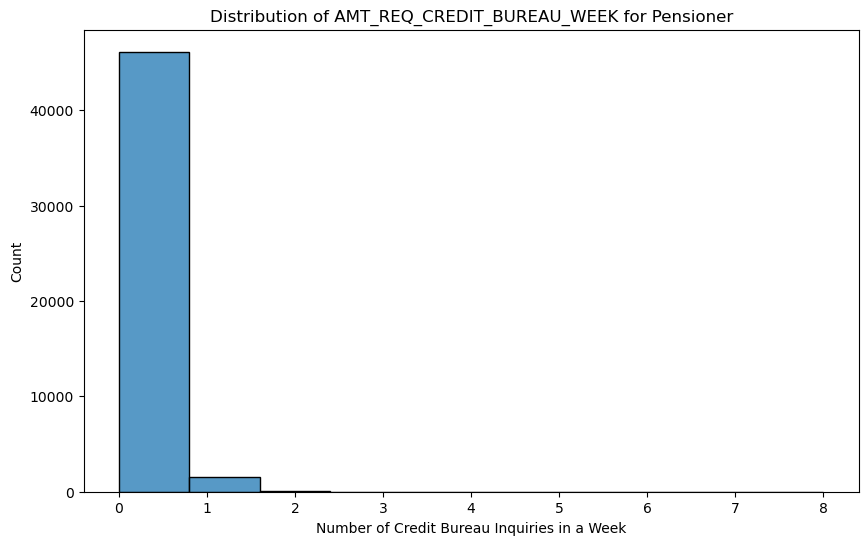

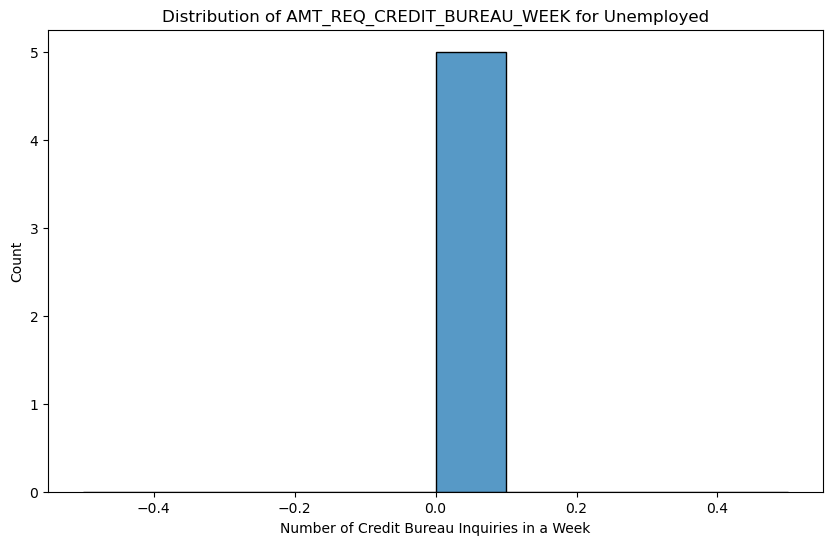

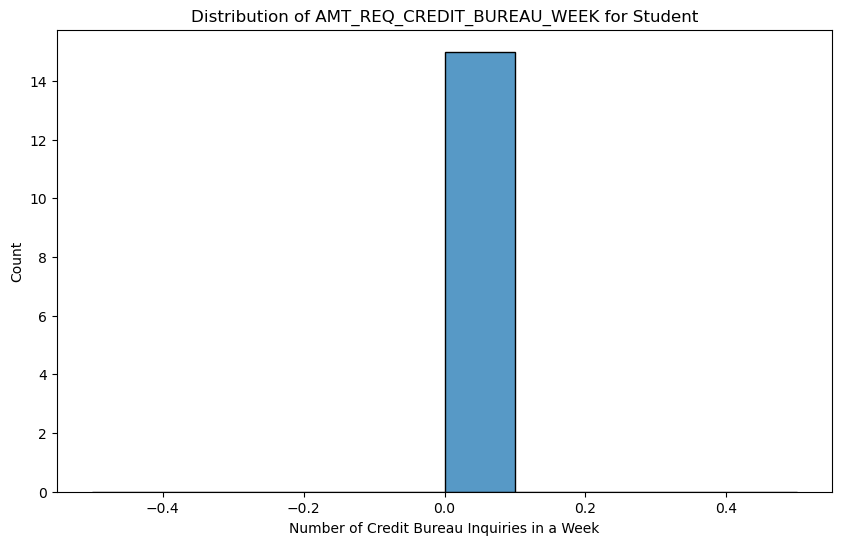

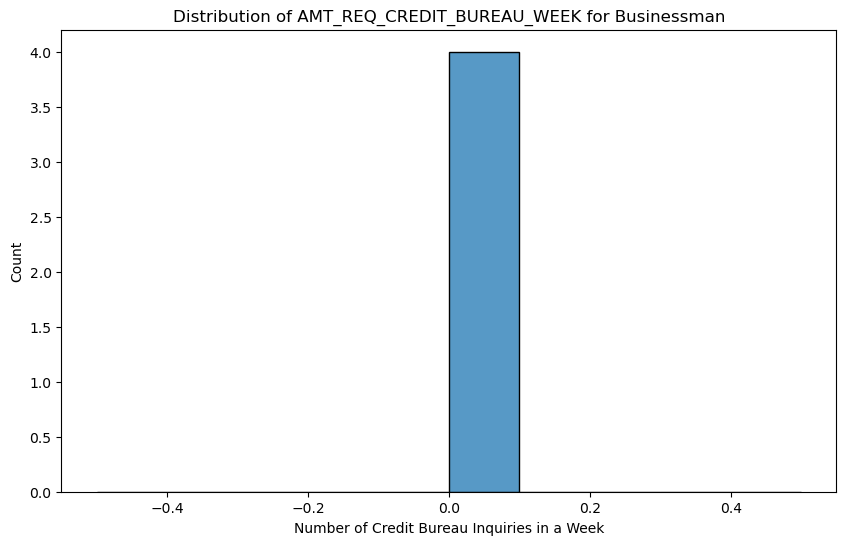

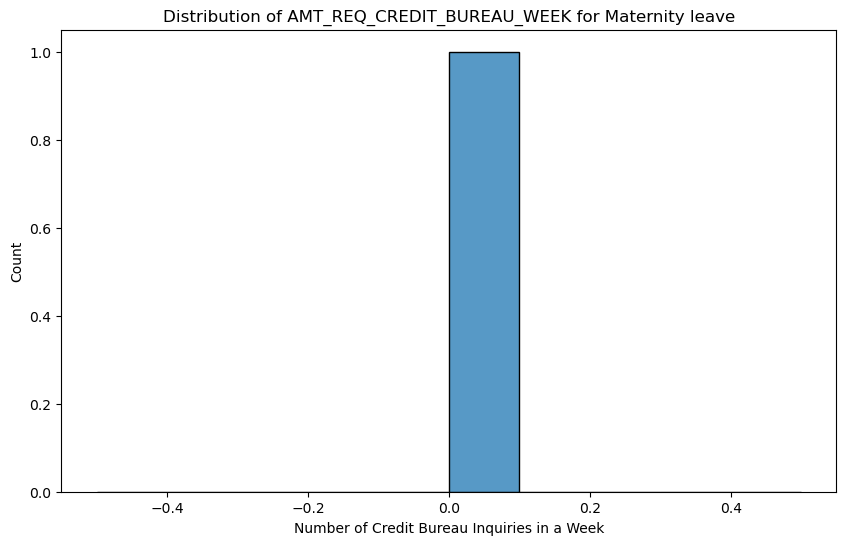

In [34]:
# Define the column for segmented analysis
segment_column = 'NAME_INCOME_TYPE'

# Iterate over each category within the column
for category in df_app_1[segment_column].unique():
    # Filter the data for the current category
    filtered_data = df_app_1[df_app_1[segment_column] == category]

    # Plot a histogram for the chosen column within the current category
    plt.figure(figsize=(10, 6))
    sb.histplot(data=filtered_data, x='AMT_REQ_CREDIT_BUREAU_WEEK', bins=10, kde=False)
    plt.xlabel('Number of Credit Bureau Inquiries in a Week')
    plt.ylabel('Count')
    plt.title(f'Distribution of AMT_REQ_CREDIT_BUREAU_WEEK for {category}')
    plt.show()


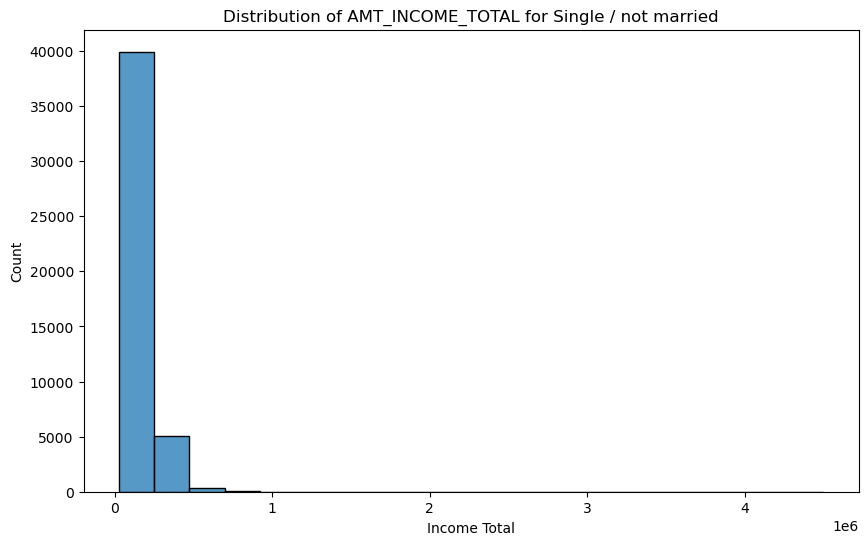

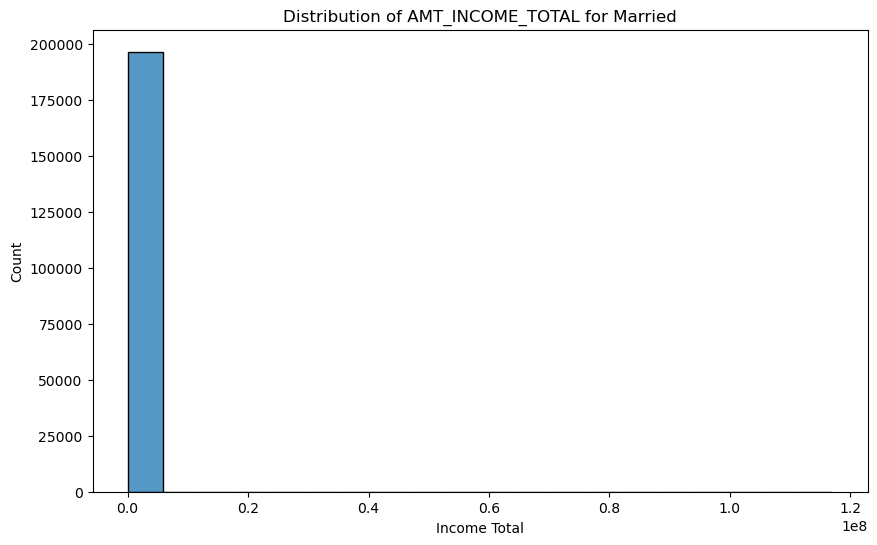

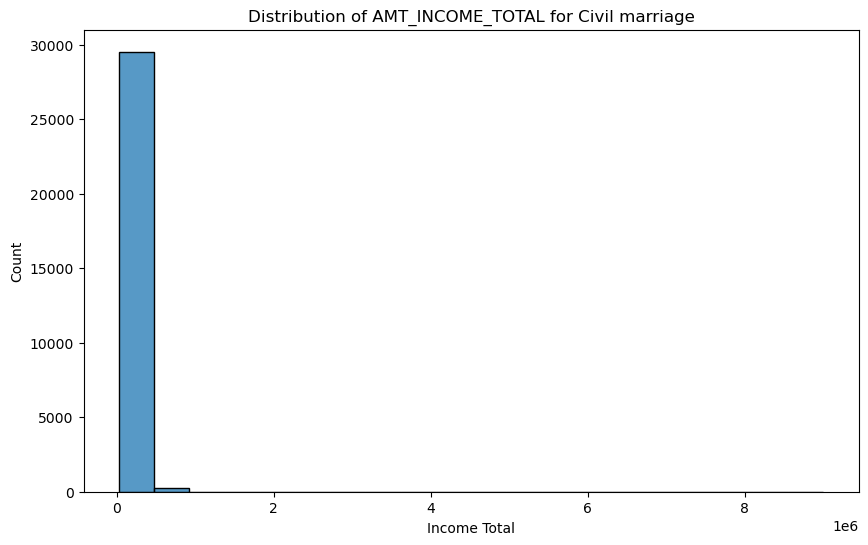

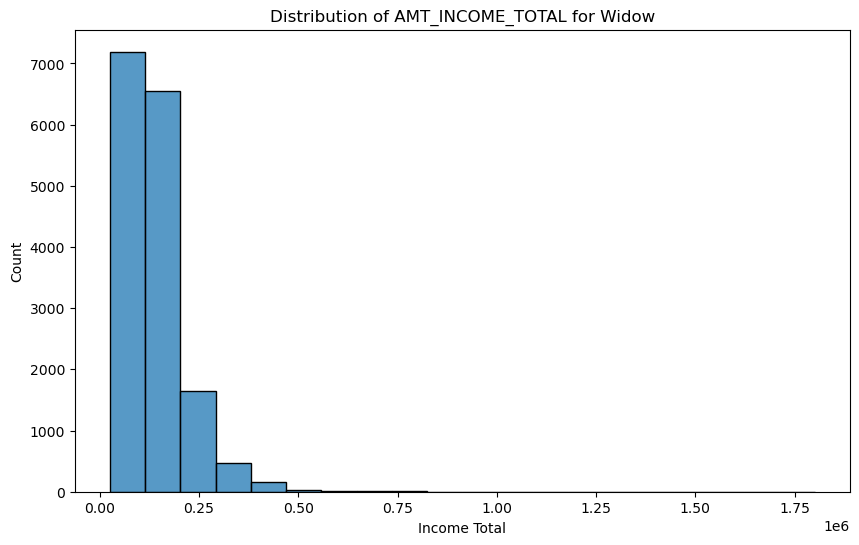

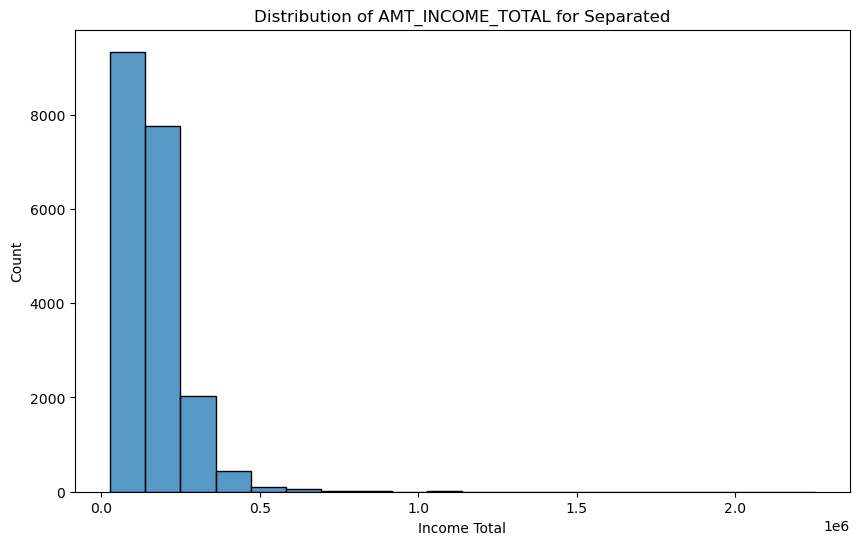

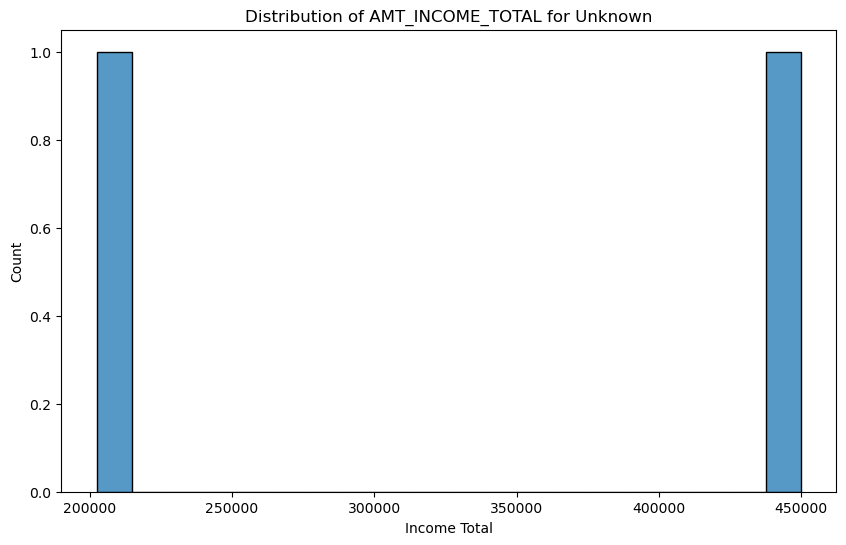

In [35]:
# Define the column for segmented analysis
segment_column = 'NAME_FAMILY_STATUS'

# Iterate over each category within the column
for category in df_app_1[segment_column].unique():
    # Filter the data for the current category
    filtered_data = df_app_1[df_app_1[segment_column] == category]

    # Plot a histogram for the chosen column within the current category
    plt.figure(figsize=(10, 6))
    sb.histplot(data=filtered_data, x='AMT_INCOME_TOTAL', bins=20, kde=False)
    plt.xlabel('Income Total')
    plt.ylabel('Count')
    plt.title(f'Distribution of AMT_INCOME_TOTAL for {category}')
    plt.show()


### Segmented Bivariate Analysis

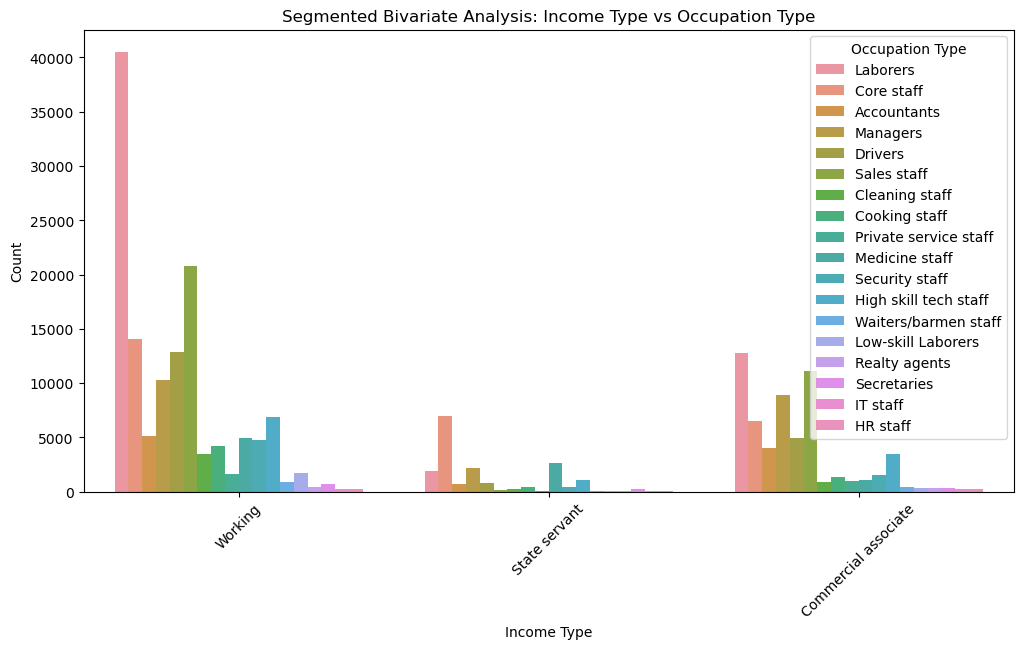

In [36]:
# Filter the data for selected income types
selected_income_types = ['Working', 'State servant', 'Commercial associate']
filtered_data = df_app_1[df_app_1['NAME_INCOME_TYPE'].isin(selected_income_types)]

plt.figure(figsize=(12, 6))
sb.countplot(data=filtered_data, x='NAME_INCOME_TYPE', hue='OCCUPATION_TYPE')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Segmented Bivariate Analysis: Income Type vs Occupation Type')
plt.xticks(rotation=45)
plt.legend(title='Occupation Type')
plt.show()


### Multivariate analysis for finding fraud and true customer for bank 

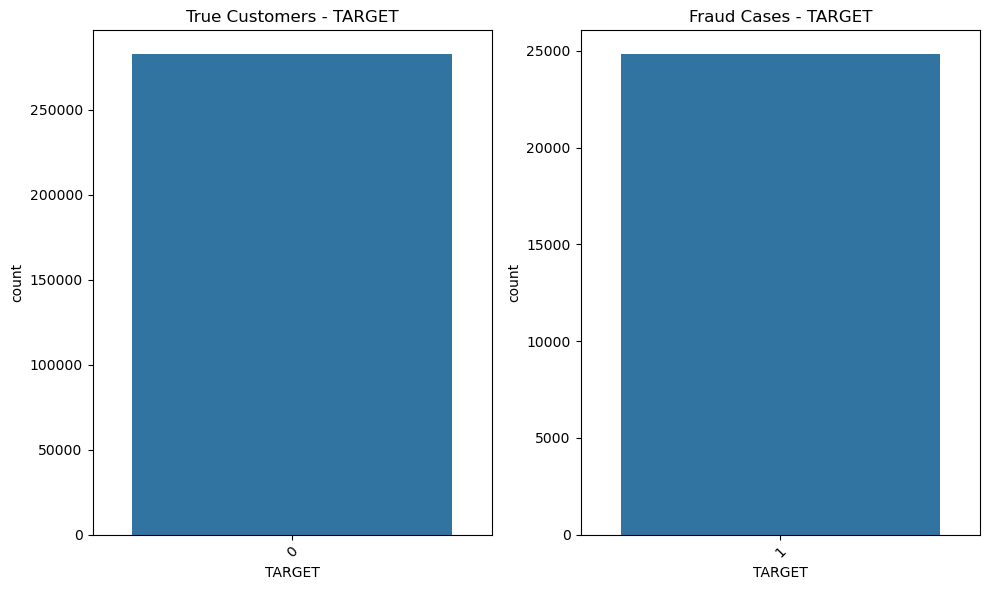

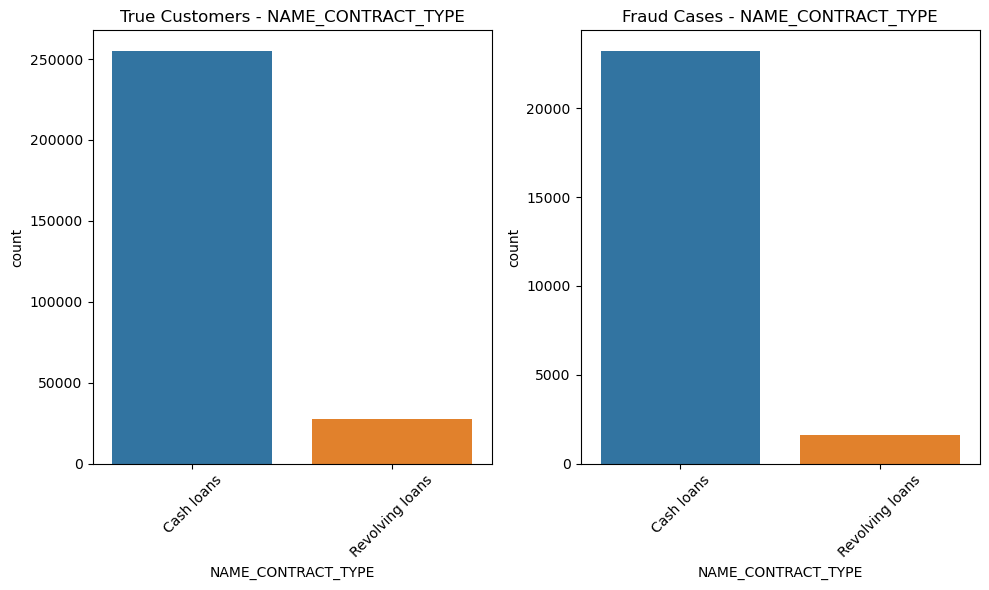

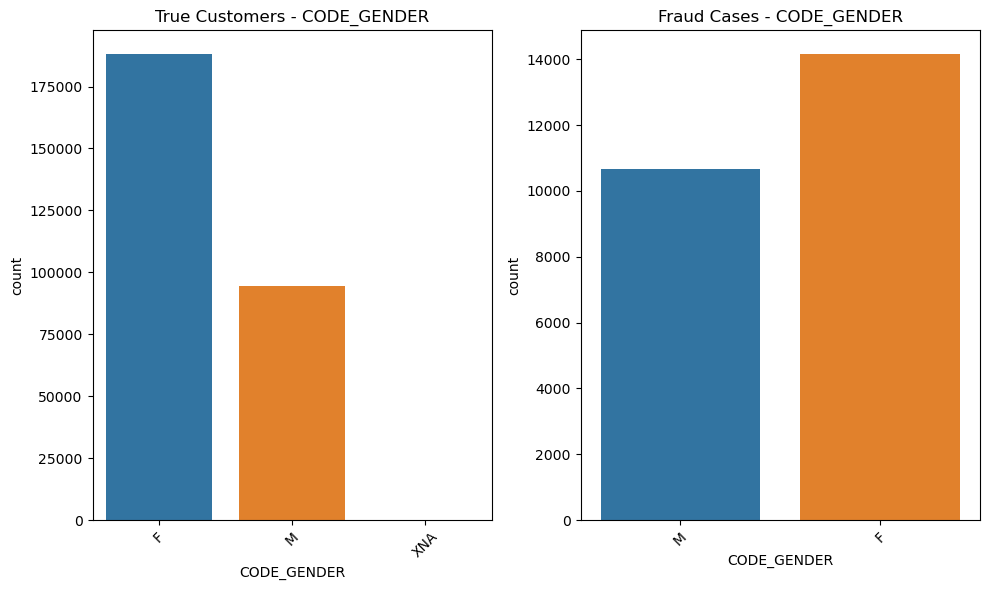

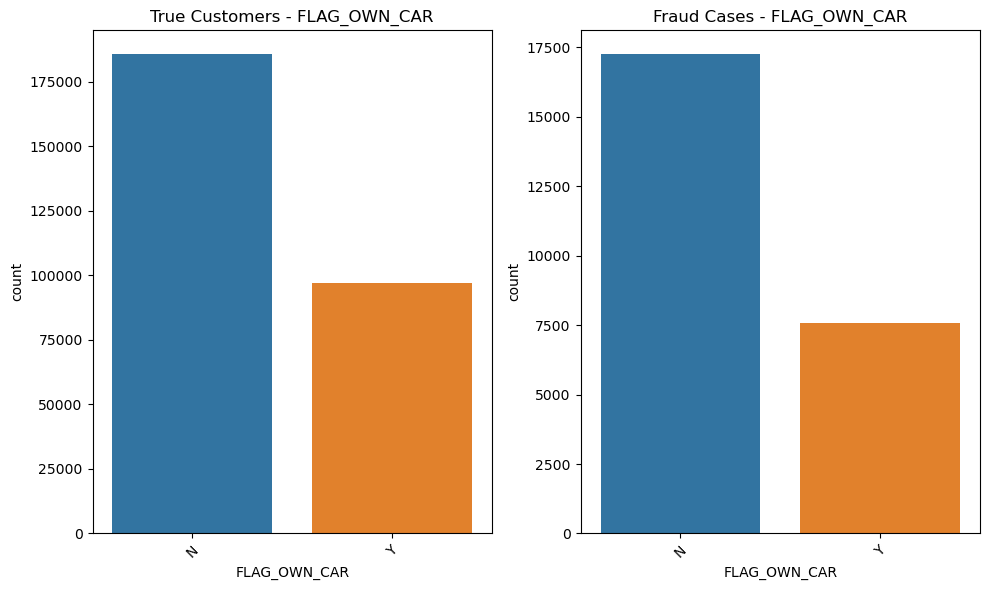

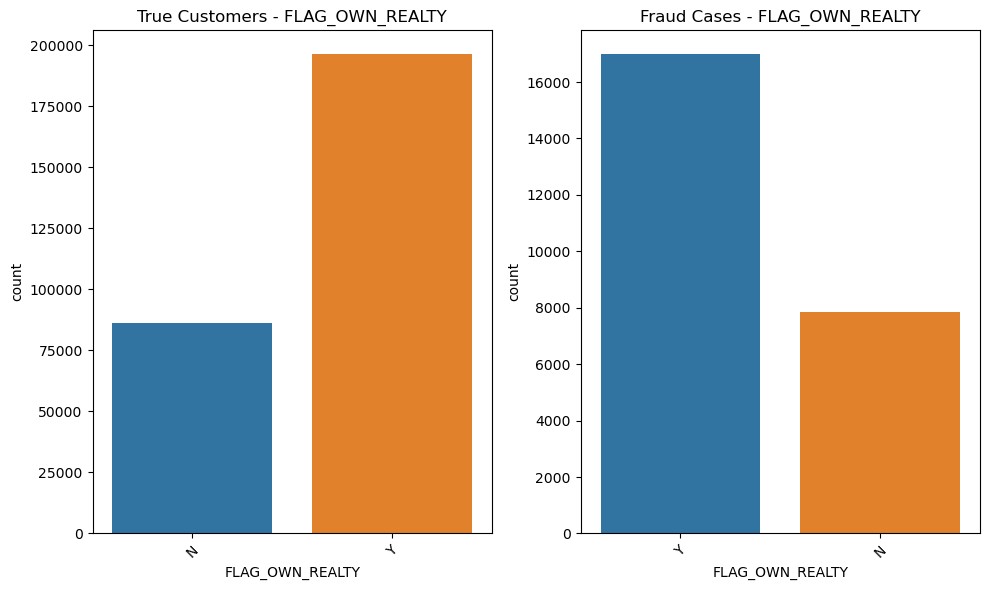

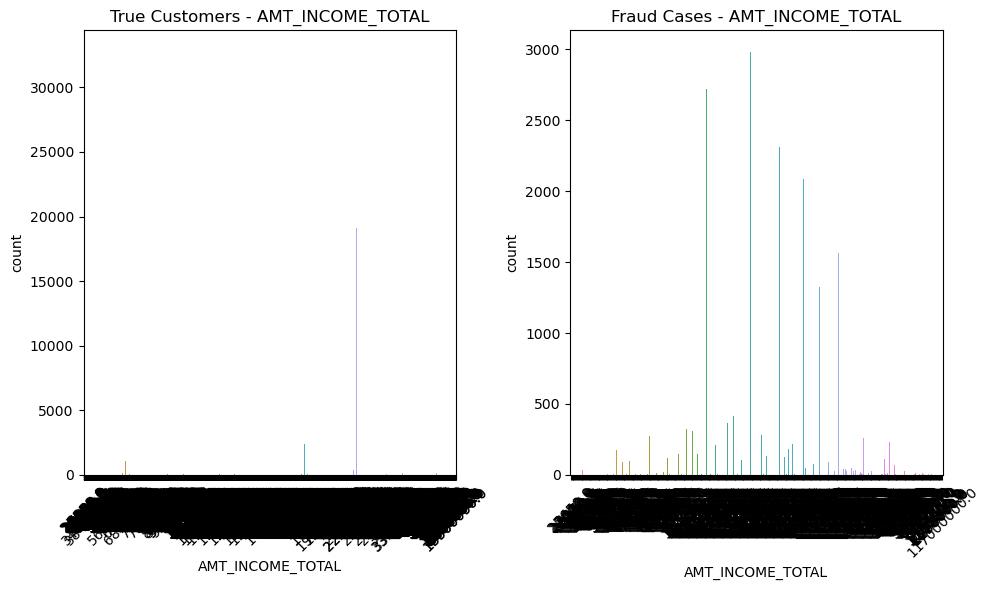

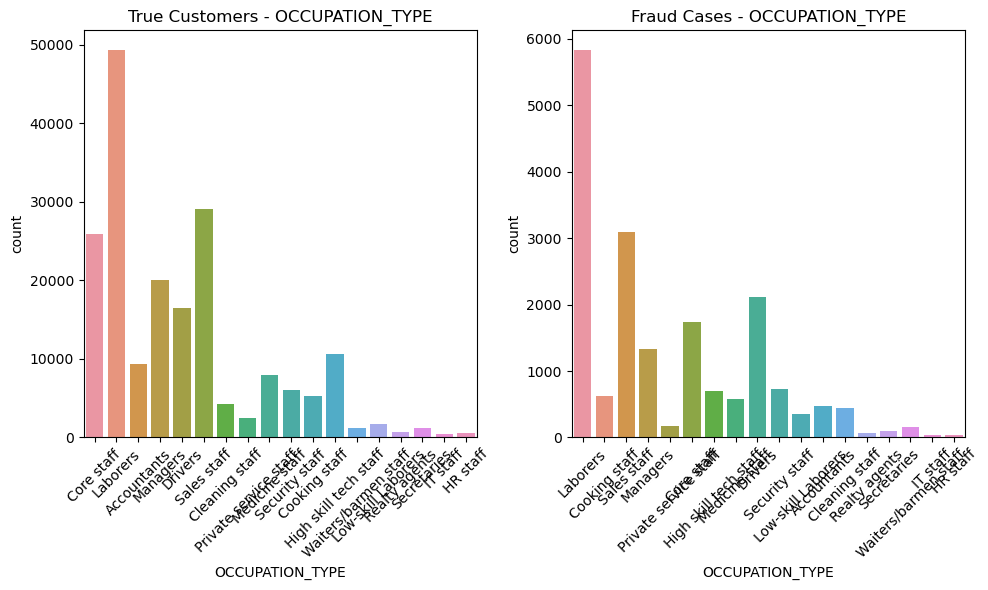

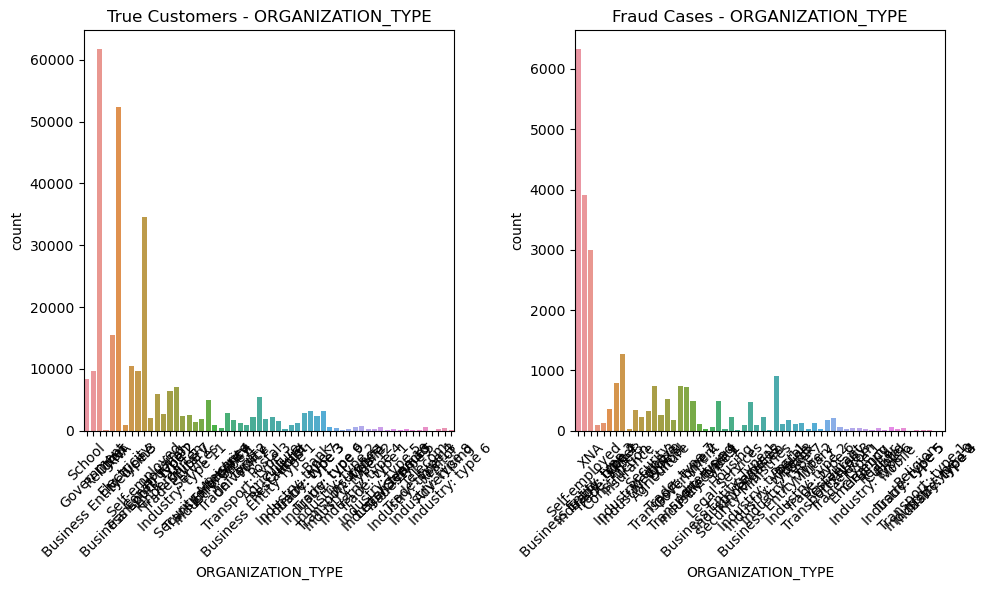

In [37]:
# Selecting the relevant columns for analysis
columns = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
           'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
filtered_data_true = df_app_1[df_app_1['TARGET'] == 0]
filtered_data_fraud = df_app_1[df_app_1['TARGET'] == 1]
for column in columns:
    plt.figure(figsize=(10, 6))
    
    # True customers
    plt.subplot(1, 2, 1)
    sb.countplot(data=filtered_data_true, x=column)
    plt.title(f'True Customers - {column}')
    plt.xticks(rotation=45)
    
    # Fraud cases
    plt.subplot(1, 2, 2)
    sb.countplot(data=filtered_data_fraud, x=column)
    plt.title(f'Fraud Cases - {column}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


##### Task : 5 : Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there. Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.

In [38]:
# Select the relevant columns for correlation analysis (Var1, Var2, Var3, Var4, Var5, TARGET)
columns_of_interest = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'DAYS_BIRTH', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'TARGET']

# Calculate the correlation matrix
corr_matrix = df_app_1[columns_of_interest].corr()

# Find the top correlations with the 'TARGET' variable
top_corr_target = corr_matrix['TARGET'].abs().sort_values(ascending=False)[:10]

print("Top correlations with the 'TARGET' variable:")
print(top_corr_target)


Top correlations with the 'TARGET' variable:
TARGET                        1.000000
EXT_SOURCE_2                  0.160472
DAYS_BIRTH                    0.078239
REGION_POPULATION_RELATIVE    0.037227
AMT_CREDIT                    0.030369
AMT_INCOME_TOTAL              0.003982
Name: TARGET, dtype: float64


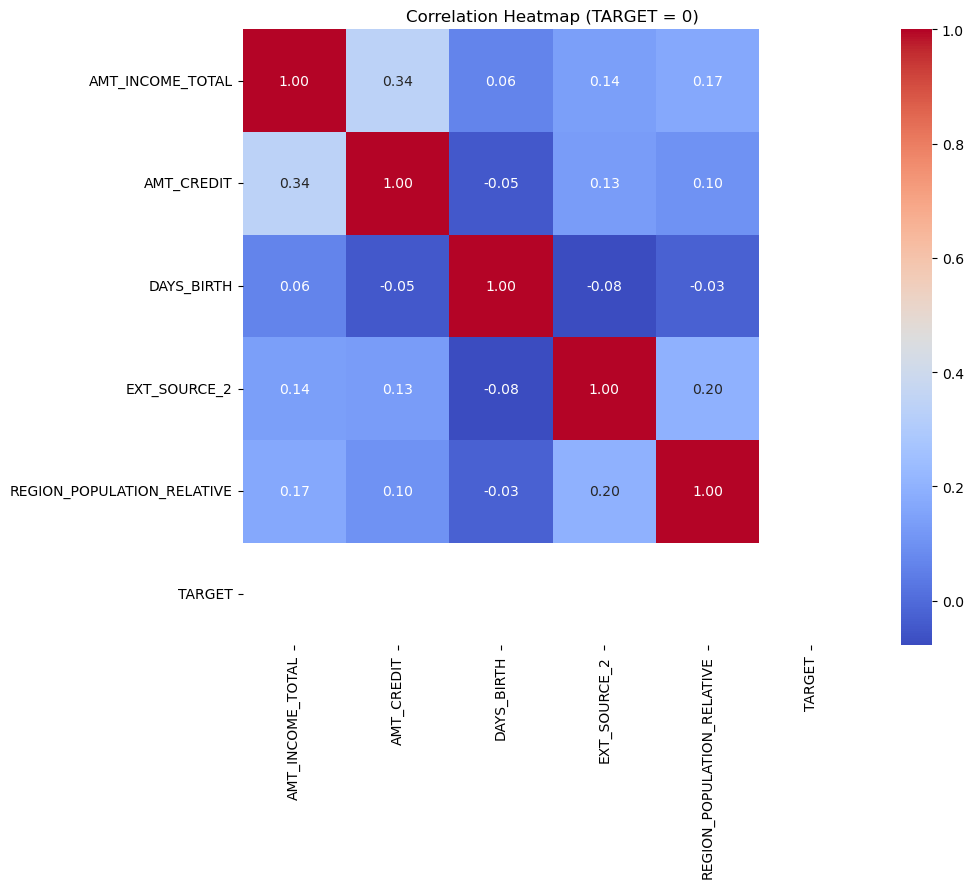

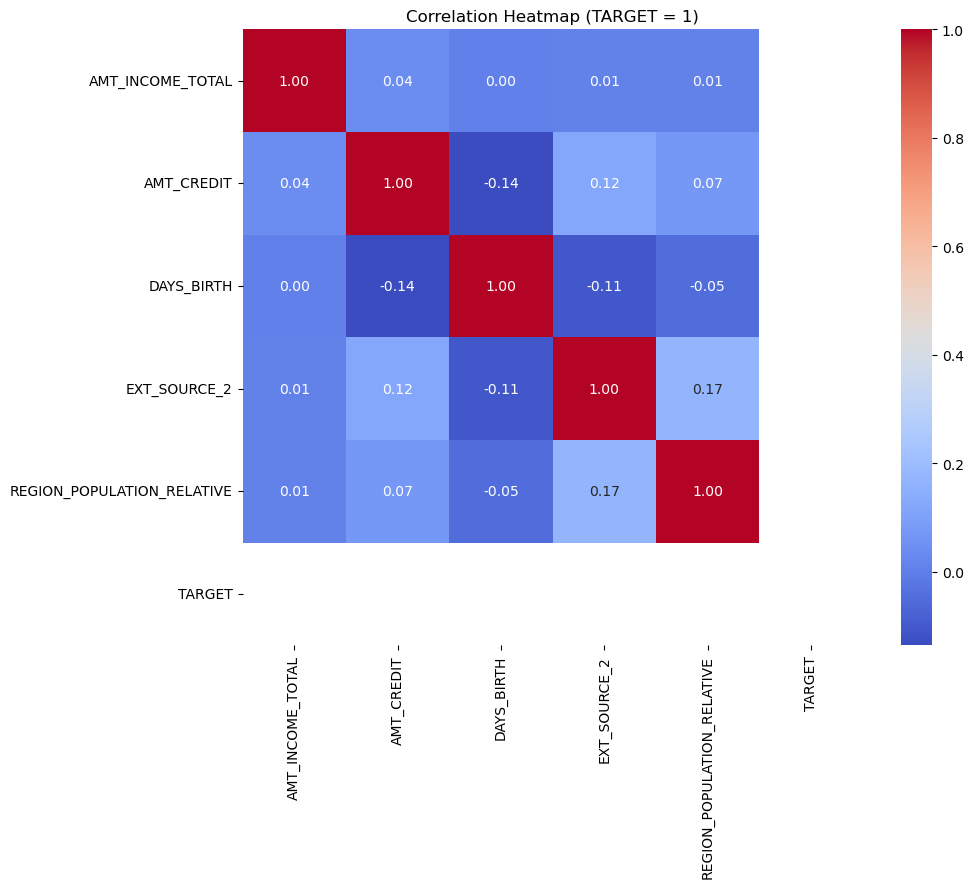

In [39]:
# Select the relevant columns for correlation analysis
columns_of_interest = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'TARGET']

# Create a subset of the dataframe for the selected columns and TARGET = 0
subset_df_target_0 = df_app_1[df_app_1['TARGET'] == 0].loc[:, columns_of_interest].copy()

# Create a subset of the dataframe for the selected columns and TARGET = 1
subset_df_target_1 = df_app_1[df_app_1['TARGET'] == 1].loc[:, columns_of_interest].copy()

# Calculate the correlation matrix for TARGET = 0
corr_matrix_target_0 = subset_df_target_0.corr()

# Calculate the correlation matrix for TARGET = 1
corr_matrix_target_1 = subset_df_target_1.corr()

# Generate the heatmap for TARGET = 0
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix_target_0, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (TARGET = 0)")
plt.show()

# Generate the heatmap for TARGET = 1
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix_target_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (TARGET = 1)")
plt.show()


### for previous_applicatio_data

In [40]:
file_path = r'E:\JOB\Trainity\Projects\Project__6_bank_case\previous_application.csv'
df_app_prev = pd.read_csv(file_path)
df_app_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_app_prev.shape

(1670214, 37)

In [42]:
df_missing_prev = pd.DataFrame(df_app_prev.isnull().mean().round(3)*100, columns = ["percentage_values_null"]).sort_values(by =['percentage_values_null'])
df_missing_prev

,percentage_values_null
SK_ID_PREV,0.0
PRODUCT_COMBINATION,0.0
NAME_YIELD_GROUP,0.0
NAME_SELLER_INDUSTRY,0.0
SELLERPLACE_AREA,0.0
CHANNEL_TYPE,0.0
NAME_PRODUCT_TYPE,0.0
NAME_PORTFOLIO,0.0
NAME_GOODS_CATEGORY,0.0
NAME_CLIENT_TYPE,0.0


In [43]:
#counting the columns by 0%, <10%, 10-50% and >50% of missing values
no_null_value = (df_missing_prev == 0).sum()
less_10_null_value = ((df_missing_prev > 0) & (df_missing_prev <= 10)).sum()
between_10_50_null_value = ((df_missing_prev > 10) & (df_missing_prev< 50)).sum()
greater_50_null_value = (df_missing_prev> 50).sum()
print("Count of Columns with no missing value:", no_null_value)
print("Count of Columns having less than 10% missing value:", less_10_null_value)
print("Count of Columns having missing value between 10% and 50%:", between_10_50_null_value)
print("Count of Columns having greater than 50% missing value:", greater_50_null_value)

Count of Columns with no missing value: percentage_values_null    23
dtype: int64
Count of Columns having less than 10% missing value: percentage_values_null    0
dtype: int64
Count of Columns having missing value between 10% and 50%: percentage_values_null    10
dtype: int64
Count of Columns having greater than 50% missing value: percentage_values_null    4
dtype: int64


In [44]:
#drop the column having missing values >50%
df_app_prev_1 = df_app_prev.drop(df_app_prev.columns[(df_app_prev.isnull().mean())*100 > 50], axis=1)
df_app_prev_1.shape


(1670214, 33)

In [45]:
#list of columns
df_app_prev_1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [46]:
# List to store columns with outliers
column_outliers = []
# List to store columns without outliers
column_none_outliers = []

# Select only numeric columns
numeric_columns_1 = df_app_prev_1.select_dtypes(include=[float, int]).columns

# Check for outliers
for c in numeric_columns_1:
    q1 = df_app_prev_1[c].quantile(0.25)
    q3 = df_app_prev_1[c].quantile(0.75)
    iqr = q3 - q1
    lower_bound_1 = q1 - 1.5 * iqr
    upper_bound_1 = q3 + 1.5 * iqr
    outliers_total = df_app_prev_1[(df_app_prev_1[c] < lower_bound_1) | (df_app_prev_1[c] > upper_bound_1)]
    
    if outliers_total.empty:
        column_none_outliers .append(c)
    else:
        column_outliers.append(c)

print("Columns with outliers:", len(column_outliers))
print(column_outliers)
print("Columns without outliers:",len(column_none_outliers))
print(column_none_outliers)

Columns with outliers: 14
['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
Columns without outliers: 3
['SK_ID_PREV', 'SK_ID_CURR', 'NFLAG_INSURED_ON_APPROVAL']


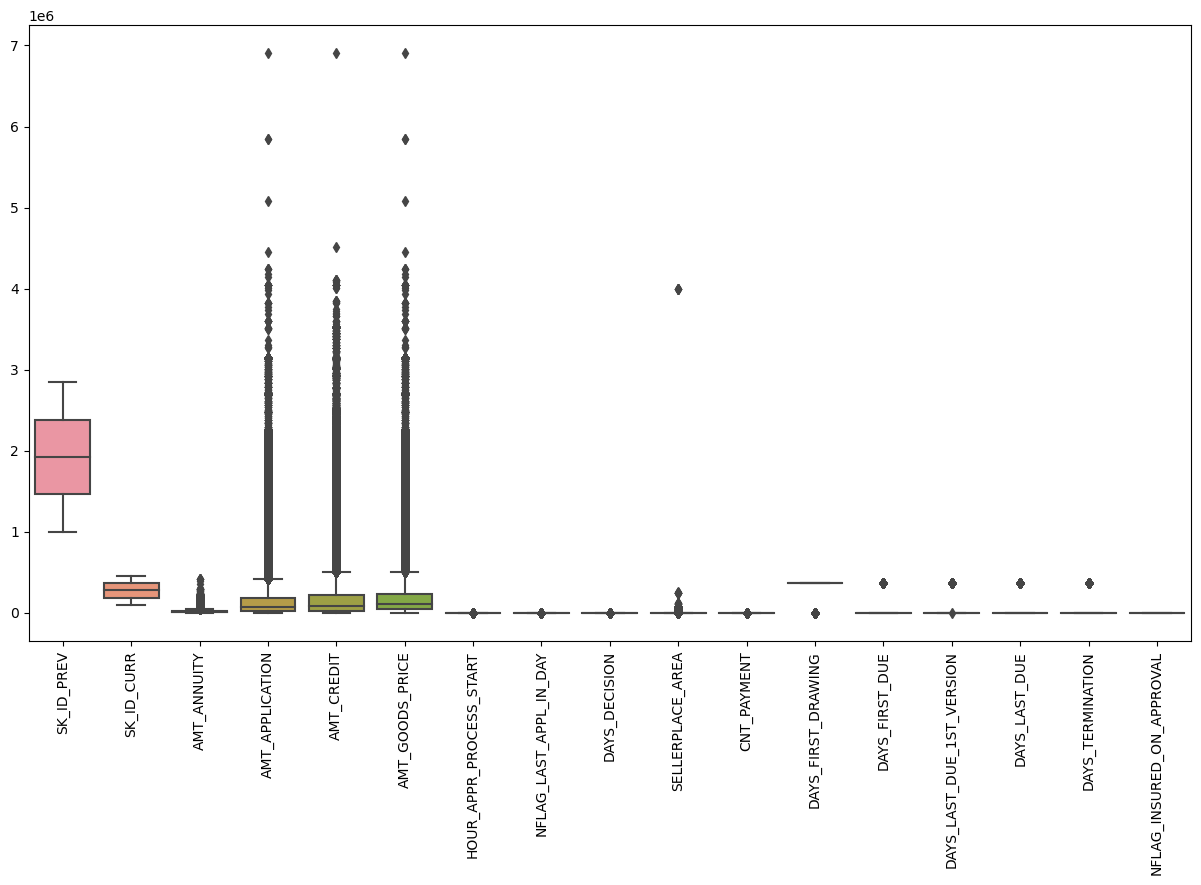

In [47]:
plt.figure(figsize=(15, 8))
sb.boxplot(data=df_app_prev_1)
plt.xticks(rotation=90)
plt.show()

In [48]:
# Select only numeric columns
numeric_columns_prev = df_app_prev_1.select_dtypes(include=[float, int]).columns

# Calculate the number and percentage of outliers in each column
outlier_counts_total = {}

# Check for outliers
for cm in numeric_columns_prev:
    q1 = df_app_prev_1[cm].quantile(0.25)
    q3 = df_app_prev_1[cm].quantile(0.75)
    iqr = q3 - q1
    lower_bd = q1 - 1.5 * iqr
    upper_bd = q3 + 1.5 * iqr
    outliers_prev = df_app_prev_1[(df_app_prev_1[cm] < lower_bd) | (df_app_prev_1[cm] > upper_bd)]
    
    outlier_count_prev = len(outliers_prev)
    total_count_prev = len(df_app_prev_1[cm])
    outlier_percentage_prev = (outlier_count_prev / total_count_prev) * 100
    
    outlier_counts_total[cm] = (outlier_count_prev, outlier_percentage_prev)

# Display the outlier counts and percentages
print("Outlier Summary:")
for cm, (count, percentage) in outlier_counts_total.items():
    print(f"{cm}: {count} outliers ({percentage:.2f}%)")


Outlier Summary:
SK_ID_PREV: 0 outliers (0.00%)
SK_ID_CURR: 0 outliers (0.00%)
AMT_ANNUITY: 82762 outliers (4.96%)
AMT_APPLICATION: 208019 outliers (12.45%)
AMT_CREDIT: 179989 outliers (10.78%)
AMT_GOODS_PRICE: 145715 outliers (8.72%)
HOUR_APPR_PROCESS_START: 1639 outliers (0.10%)
NFLAG_LAST_APPL_IN_DAY: 5900 outliers (0.35%)
DAYS_DECISION: 17571 outliers (1.05%)
SELLERPLACE_AREA: 268087 outliers (16.05%)
CNT_PAYMENT: 55903 outliers (3.35%)
DAYS_FIRST_DRAWING: 62705 outliers (3.75%)
DAYS_FIRST_DUE: 40645 outliers (2.43%)
DAYS_LAST_DUE_1ST_VERSION: 93865 outliers (5.62%)
DAYS_LAST_DUE: 211221 outliers (12.65%)
DAYS_TERMINATION: 225913 outliers (13.53%)
NFLAG_INSURED_ON_APPROVAL: 0 outliers (0.00%)


### Data imbalance

In [49]:
class_counts_prev = df_app_prev_1['NAME_CONTRACT_TYPE'].value_counts()
class_proportions_prev = class_counts_prev / len(df_app_prev_1) * 100
print("Class Counts:")
print(class_counts_prev)
print("\nClass Proportions (%):")
print(class_proportions_prev)


Class Counts:
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

Class Proportions (%):
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64


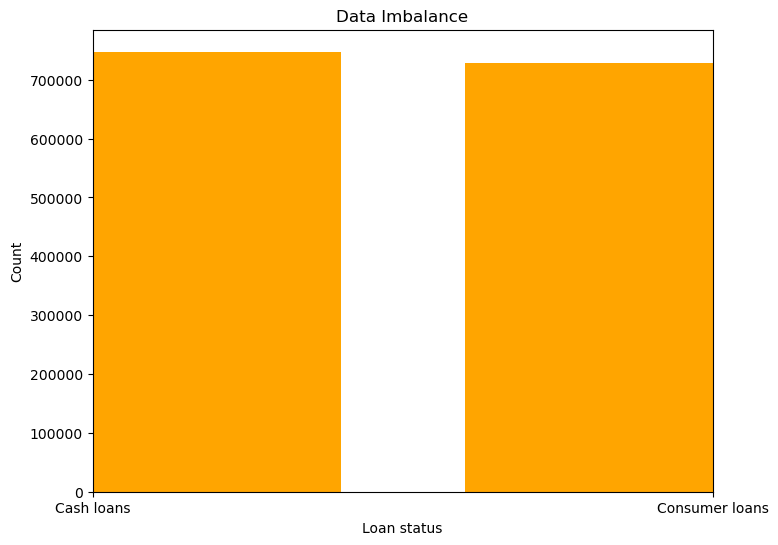

In [50]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_app_prev_1['NAME_CONTRACT_TYPE'].value_counts().index, df_app_prev_1['NAME_CONTRACT_TYPE'].value_counts(), color = 'orange')

# Set the x-axis limits
plt.xlim(0, 1)

# Set the labels and title
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.title('Data Imbalance')

# Display the plot
plt.show()

## Univariate analysis

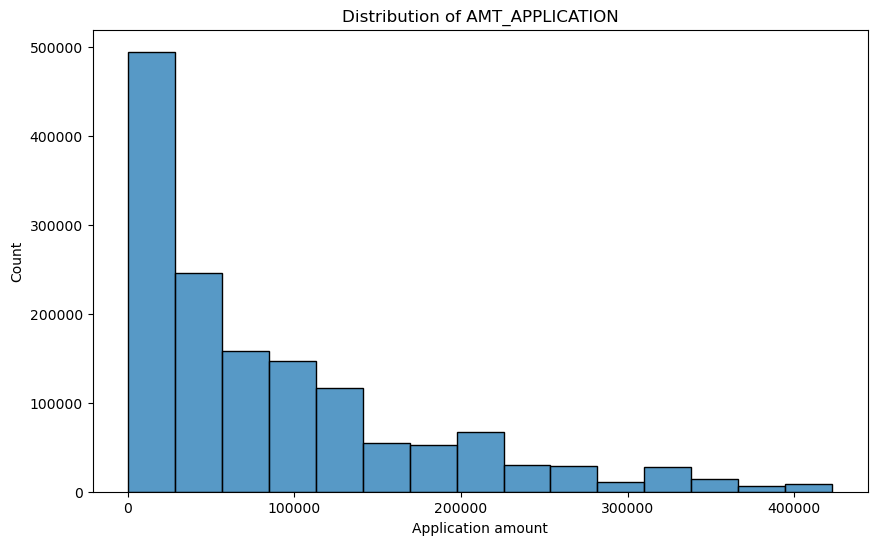

In [51]:
Q1_prev = df_app_prev_1['AMT_APPLICATION'].quantile(0.25)
Q3_prev = df_app_prev_1['AMT_APPLICATION'].quantile(0.75)
IQR_prev = Q3_prev - Q1_prev
# Remove outliers
filtered_data = df_app_prev_1[(df_app_prev_1['AMT_APPLICATION'] >= Q1_prev - 1.5 * IQR_prev) & (df_app_prev_1['AMT_APPLICATION'] <= Q3_prev + 1.5 * IQR_prev)]
# Plot the histogram
plt.figure(figsize=(10, 6))
sb.histplot(data=filtered_data , x='AMT_APPLICATION', bins=15, kde=False)
plt.xlabel('Application amount')
plt.ylabel('Count')
plt.title('Distribution of AMT_APPLICATION')
plt.show()

In [52]:
df_app_prev_1['DAYS_DECISION'].dtypes
df_app_prev_1['DAYS_DECISION'] = df_app_prev_1['DAYS_DECISION'] * -1

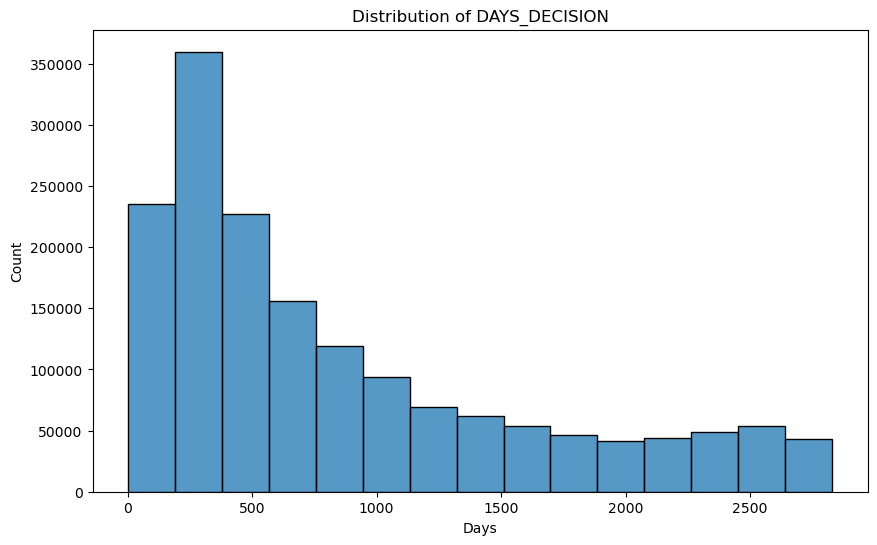

In [53]:
Q1_prev = df_app_prev_1['DAYS_DECISION'].quantile(0.25)
Q3_prev = df_app_prev_1['DAYS_DECISION'].quantile(0.75)
IQR_prev = Q3_prev - Q1_prev
# Remove outliers
filtered_data = df_app_prev_1[(df_app_prev_1['DAYS_DECISION'] >= Q1_prev - 1.5 * IQR_prev) & (df_app_prev_1['DAYS_DECISION'] <= Q3_prev + 1.5 * IQR_prev)]
# Plot the histogram
plt.figure(figsize=(10, 6))
sb.histplot(data=filtered_data , x='DAYS_DECISION', bins=15, kde=False)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Distribution of DAYS_DECISION')
plt.show()

### Segmented bivariate analysis

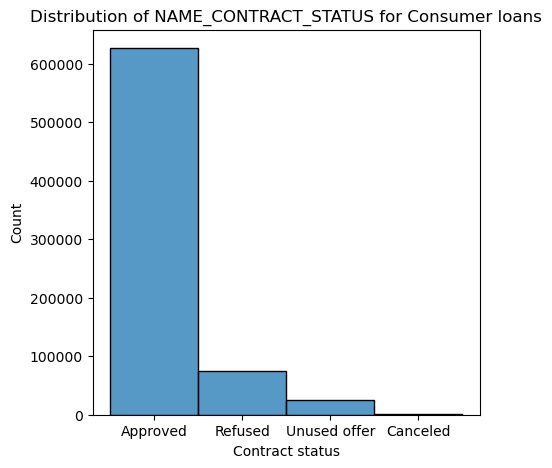

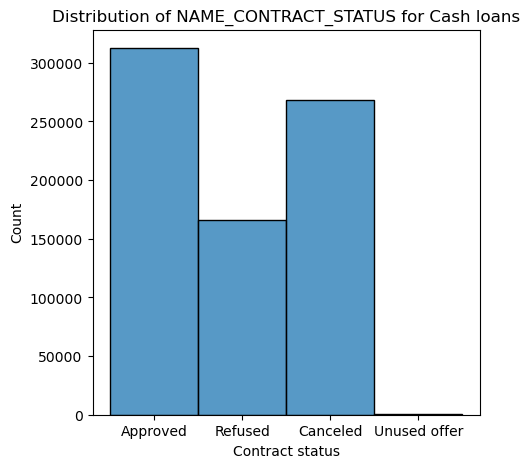

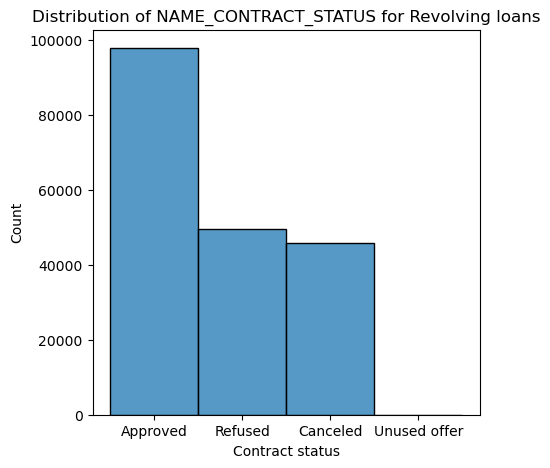

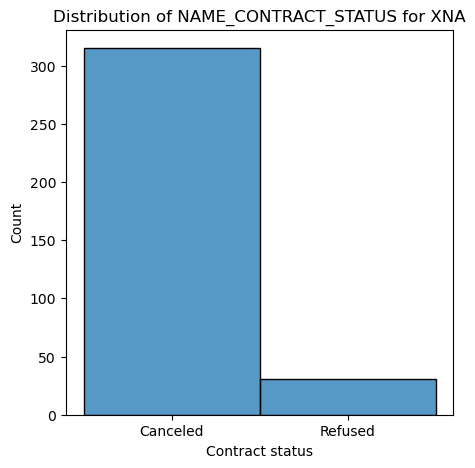

In [54]:
# Define the column for segmented analysis
segment_column_prev = 'NAME_CONTRACT_TYPE'

# Iterate over each category within the column
for cat in df_app_prev_1[segment_column_prev].unique():
    filtered_data_prev = df_app_prev_1[df_app_prev_1[segment_column_prev] == cat]

    # Plot a histogram for the chosen column within the current category
    plt.figure(figsize=(5,5))
    sb.histplot(data=filtered_data_prev, x='NAME_CONTRACT_STATUS', bins=10, kde=False)
    plt.xlabel('Contract status')
    plt.ylabel('Count')
    plt.title(f'Distribution of NAME_CONTRACT_STATUS for {cat}')
    plt.show()


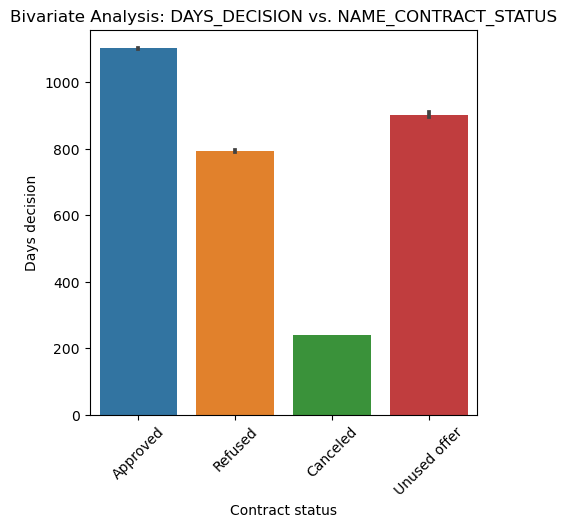

In [55]:
# Bivariate analysis between contract status and days decision 
plt.figure(figsize=(5,5))
sb.barplot(data=df_app_prev_1, x='NAME_CONTRACT_STATUS', y='DAYS_DECISION')
plt.xlabel('Contract status')
plt.ylabel('Days decision')
plt.title('Bivariate Analysis: DAYS_DECISION vs. NAME_CONTRACT_STATUS')
plt.xticks(rotation=45)
plt.show()


In [56]:
# Calculate the percentage of clients in each category for a categorical feature
def calculate_percentage(df, column):
    category_counts = df[column].value_counts()
    category_percentages = category_counts / len(df) * 100
    return category_percentages

# Calculate the percentage of defaulters in each category for a categorical feature
def calculate_defaulters_percentage(df, column):
    defaulters_counts = df[df['TARGET'] == 1][column].value_counts()
    defaulters_percentages = defaulters_counts / len(df[df['TARGET'] == 1]) * 100
    return defaulters_percentages

# Calculate the percentage of non-defaulters in each category for a categorical feature
def calculate_non_defaulters_percentage(df, column):
    non_defaulters_counts = df[df['TARGET'] == 0][column].value_counts()
    non_defaulters_percentages = non_defaulters_counts / len(df[df['TARGET'] == 0]) * 100
    return non_defaulters_percentages

# Perform analysis for each categorical feature
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']
for feature in categorical_features:
    print("Analysis for", feature)
    print("Percentage of clients in each category:")
    print(calculate_percentage(df_app_1, feature))
    print("Percentage of defaulters in each category:")
    print(calculate_defaulters_percentage(df_app_1, feature))
    print("Percentage of non-defaulters in each category:")
    print(calculate_non_defaulters_percentage(df_app_1, feature))
    print()


Analysis for NAME_CONTRACT_TYPE
Percentage of clients in each category:
Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64
Percentage of defaulters in each category:
Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64
Percentage of non-defaulters in each category:
Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

Analysis for CODE_GENDER
Percentage of clients in each category:
F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64
Percentage of defaulters in each category:
F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64
Percentage of non-defaulters in each category:
F      66.603228
M      33.395357
XNA     0.001415
Name: CODE_GENDER, dtype: float64

Analysis for NAME_INCOME_TYPE
Percentage of clients in each category:
Working                 51.631974
Commercial associate    23.289248
Pensioner   

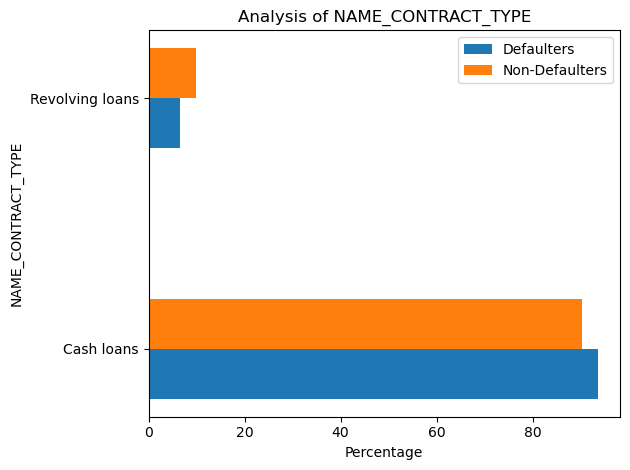

In [62]:
# Create horizontal bar plot for NAME_CONTRACT_TYPE
fig, ax = plt.subplots()
category_percentages = calculate_percentage(df_app_1, 'NAME_CONTRACT_TYPE')
defaulters_percentages = calculate_defaulters_percentage(df_app_1, 'NAME_CONTRACT_TYPE')
non_defaulters_percentages = calculate_non_defaulters_percentage(df_app_1, 'NAME_CONTRACT_TYPE')
index = list(range(len(category_percentages)))
bar_width = 0.2
plt.barh(index, defaulters_percentages, bar_width, label='Defaulters')
plt.barh([i + bar_width for i in index], non_defaulters_percentages, bar_width, label='Non-Defaulters')
plt.xlabel('Percentage')
plt.ylabel('NAME_CONTRACT_TYPE')
plt.title('Analysis of NAME_CONTRACT_TYPE')
plt.yticks([i + bar_width / 2 for i in index], category_percentages.index)
plt.legend()
plt.tight_layout()
plt.show()


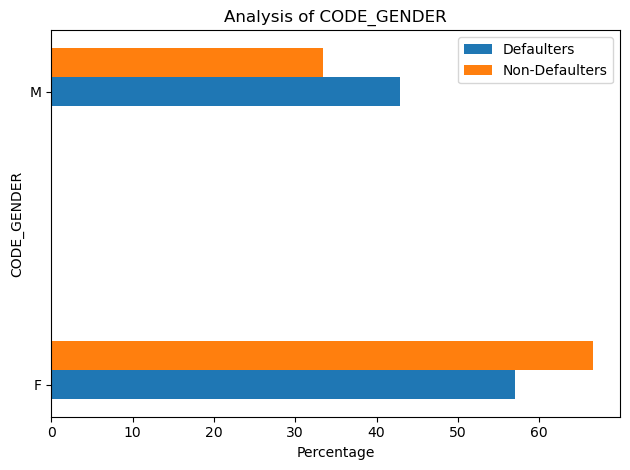

In [72]:
# Filter the dataframe to exclude 'XNA' category in CODE_GENDER
df_gender = df_app_1[df_app_1['CODE_GENDER'] != 'XNA']

# Calculate the percentage of clients in each category for CODE_GENDER
category_percentages = calculate_percentage(df_gender, 'CODE_GENDER')
defaulters_percentages = calculate_defaulters_percentage(df_gender, 'CODE_GENDER')
non_defaulters_percentages = calculate_non_defaulters_percentage(df_gender, 'CODE_GENDER')

# Create horizontal bar plot for CODE_GENDER
fig, ax = plt.subplots()
index = list(range(len(category_percentages)))
bar_width = 0.1
plt.barh(index, defaulters_percentages, bar_width, label='Defaulters')
plt.barh([i + bar_width for i in index], non_defaulters_percentages, bar_width, label='Non-Defaulters')
plt.xlabel('Percentage')
plt.ylabel('CODE_GENDER')
plt.title('Analysis of CODE_GENDER')
plt.yticks(index, category_percentages.index)
plt.legend()
plt.tight_layout()
plt.show()


## statistical test : to check distribution of each category among defaluters and non-defaulters

In [73]:
import scipy.stats as stats

def perform_t_test(feature, df):
    defaulter_values = df[df['TARGET'] == 1][feature]
    non_defaulter_values = df[df['TARGET'] == 0][feature]
    t_statistic, p_value = stats.ttest_ind(defaulter_values, non_defaulter_values)
    return t_statistic, p_value

def perform_chi2_test(feature, df):
    contingency_table = pd.crosstab(df['TARGET'], df[feature])
    chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
    return chi2_statistic, p_value

# Perform statistical tests for each feature
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']
numerical_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

for feature in categorical_features:
    print("Statistical tests for", feature)
    t_statistic, p_value = perform_chi2_test(feature, df_app_1)
    print("Chi-square test:")
    print("Chi2 Statistic:", t_statistic)
    print("P-value:", p_value)
    print()

for feature in numerical_features:
    print("Statistical tests for", feature)
    t_statistic, p_value = perform_t_test(feature, df_app_1)
    print("T-test:")
    print("T Statistic:", t_statistic)
    print("P-value:", p_value)
    print()


Statistical tests for NAME_CONTRACT_TYPE
Chi-square test:
Chi2 Statistic: 293.15054219964554
P-value: 1.0235150721172847e-65

Statistical tests for CODE_GENDER
Chi-square test:
Chi2 Statistic: 920.7913340361749
P-value: 1.1290217848908289e-200

Statistical tests for NAME_INCOME_TYPE
Chi-square test:
Chi2 Statistic: 1253.4708080924988
P-value: 1.9281456056858933e-266

Statistical tests for NAME_EDUCATION_TYPE
Chi-square test:
Chi2 Statistic: 1019.2131873088356
P-value: 2.4476812052198174e-219

Statistical tests for AMT_INCOME_TOTAL
T-test:
T Statistic: -2.2081011084695983
P-value: 0.027237960879677118

Statistical tests for AMT_CREDIT
T-test:
T Statistic: -16.848601925306788
P-value: 1.1474602724788813e-63

Statistical tests for AMT_ANNUITY
T-test:
T Statistic: nan
P-value: nan



## END

### Author : 
Vaishnavi Patel 

#### Data Analyst Trainee 